## Notebook Description: Model Predictions on Cityscapes

This Jupyter notebook demonstrates the evaluation and visualization of trained segmentation models on the Cityscapes dataset. The notebook:
#
**Purpose**: Tests and visualizes predictions from pre-trained segmentation models UNet on urban street scene images from Cityscapes.
#
**Key Features**:
- Loads pre-trained models from checkpoints for the Cityscapes dataset
- Supports both from-scratch and fine-tuned model variants
- Generates predictions on the Cityscapes validation set and compares them with ground truth masks
- Provides side-by-side visualization of original images, ground truth masks, and model predictions
#
**Workflow**:
1. Configures dataset parameters and model paths for Cityscapes
2. Processes validation data and generates predictions
3. Visualizes results comparing original images, ground truth, and predictions
#
**Dataset**: Works with the Cityscapes semantic segmentation dataset, which contains 20 output classes for urban scene understanding.


In [1]:
from pathlib import Path
import sys
sys.path.append("..")
absolute_path = Path('..')


import matplotlib.pyplot as plt
import numpy as np
from Modules.CityscapeDataset.tools import decode_segmap
# %%
import os
from sys import path
path.append('..')
from Modules.Architecture import generate_model
from Modules.ModelXAI import generate_XAI_model

# generate dataloader for cityscapes
from Modules.CityscapeDataset.core import create_cityscapes_dataloaders
from Modules.CityscapeDataset.tools import decode_segmap

dataset_type='cityscapes'

_, val_loader, _  = create_cityscapes_dataloaders(
    root=absolute_path / "datasets" / "cityscapes",
    batch_size=1,
    num_workers=2,
    augment_train=None,
)


base_dir: str = f"../datasets/{dataset_type}"
device = 'cuda:0'
model_type = 'unet'

OUT_CHANNELS = 20
models_path = f"../models/{dataset_type}/{model_type}"
model_name = f"best_model.pth"


print(f"Loading model from {models_path}")
print(f"Model name: {model_name}")


# %%
print("Loading model...")
model = generate_model(
    model_type= model_type, 
    out_channels=OUT_CHANNELS, 
    load_from_checkpoint=True,
    models_path=models_path, 
    checkpoint_name=model_name
).eval().to(device)

# Prepare model for XAI
model = generate_XAI_model(model=model, device=device)

/home/bonobo/anaconda3/envs/camera/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/bonobo/anaconda3/envs/camera/lib/python3.8/site-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 2.0.8 (you have 1.4.18). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


Loading model from ../models/cityscapes/unet
Model name: best_model.pth
Loading model...
../models/cityscapes/unet/best_model.pth


/media/bonobo/flaref/SegClarity/Notebooks/../Modules/Architecture/core.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(


Model loaded successfully


In [2]:
for image_batch,mask_batch,names in val_loader:
    image_batch = image_batch.to(device)
    mask_batch = mask_batch.to(device)
    break

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
/tmp/ipykernel_2689494/1278573314.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


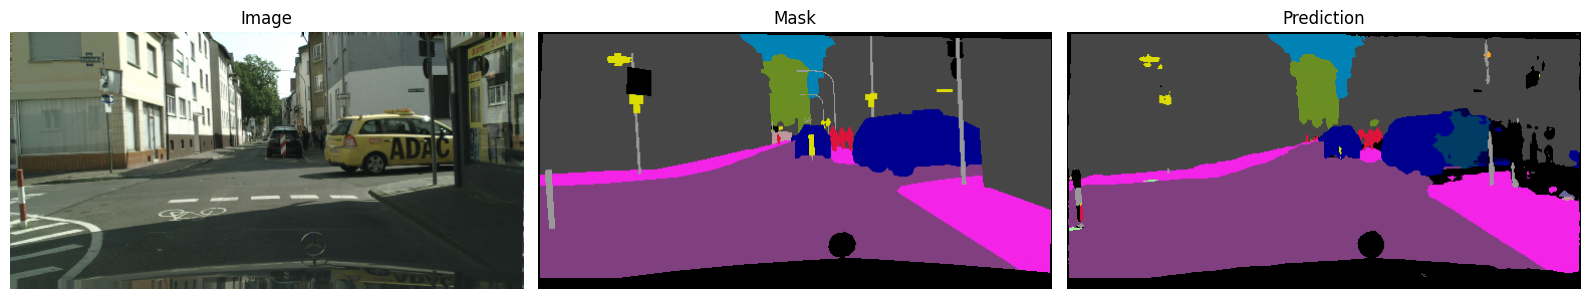

In [3]:
pred= model(image_batch).max(dim=1)[1]

fig, ax = plt.subplots(1, 3, figsize=(16, 10))
ax[0].imshow(image_batch[0].permute(1, 2, 0).detach().cpu().numpy() * np.array([0.229, 0.224, 0.225]) + np.array([0.485, 0.456, 0.406]));_ = ax[0].axis('off'); ax[0].set_title('Image')
ax[1].imshow(decode_segmap(mask_batch[0].detach().cpu()));_ = ax[1].axis('off'); ax[1].set_title('Mask')
ax[2].imshow(decode_segmap(pred[0].detach().cpu()));_ = ax[2].axis('off'); ax[2].set_title('Prediction')
fig.tight_layout()
fig.show()
